# CIFAR-10 을 이용한 CNN 구축

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices() # 텐서플로우에 현재 GPU가 있는지 없는지 확인하는 코드
# GPU가 연결되어 있음

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4626409377105815184
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14626652160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3399236993335371232
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
tf.__version__

'2.17.1'

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data() # 4개로 데이터를 분리해서 반환해준다

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
y_train[0][0]

6

# 훈련 데이터 5만개 중에 랜덤하게 16개의 이미지 시각화

In [ ]:
cifar10_classes = ['airplane', 'automobile', 'bird','cat','deer','dog','frog','horse','ship','truck']

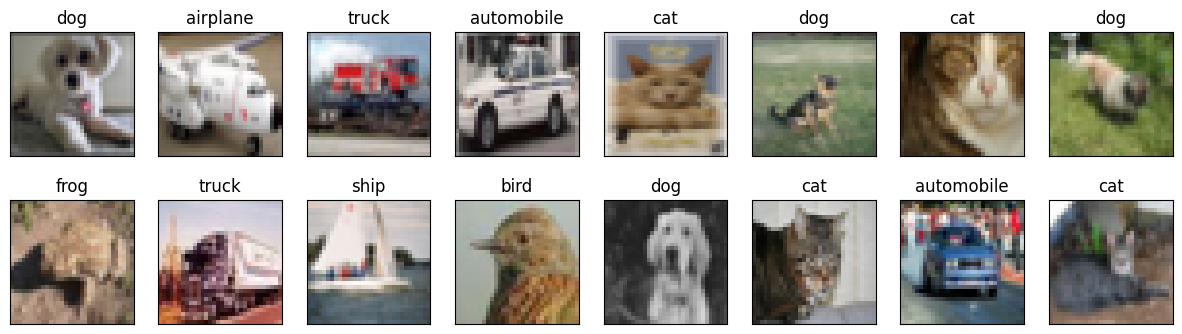

In [ ]:
fig, axes = plt.subplots(2, 8, figsize = (15,4))
# axes : list 형태로 되어 있음, 첫번째 리스트, 두번째 리스트로 되어 있음
axes = axes.ravel() #  for문을 돌려주기 위해 axes.rave()을 해주면 다 한줄의 리스트로 바뀜
for i in range(16):
  idx = np.random.randint(0,len(X_train))
  axes[i].imshow(X_train[idx]) # 5만개중 16개를 임의로 선택
  axes[i].set_xticks([])
  axes[i].set_yticks([])
  axes[i].set_title(cifar10_classes[y_train[idx][0]])

In [ ]:
cifa10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

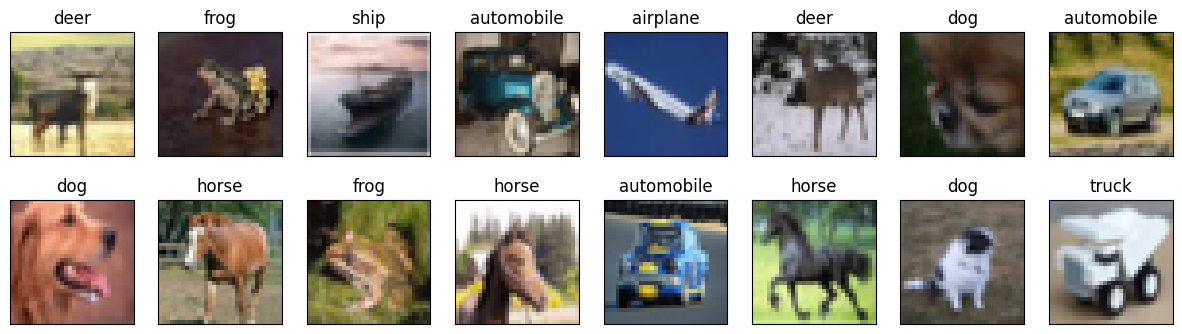

In [ ]:
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
axes = axes.ravel()
for i in range(16):
    idx = np.random.randint(0, len(y_train))
    axes[i].imshow(X_train[idx, :])
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(cifa10_classes[y_train[idx, 0]])

# 심플 스케일링

In [ ]:
# data normalization
X_train_scaled = X_train / 255.
X_test_scaled  = X_test / 255.

# 원-핫 인코딩

In [ ]:
# one-hot encoding of class labels
y_train_onehot = utils.to_categorical(y_train)
y_test_onehot  = utils.to_categorical(y_test)
print(y_train_onehot.shape)
print(y_test_onehot.shape)

(50000, 10)
(10000, 10)


In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_onehot)).shuffle(10000).batch(64)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_onehot)).batch(64)

# 모델 정의

In [ ]:
# model build
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3))) # 칼라 이미지니깐 (32.32.3)
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2))) # stride를 생략 했으면 기본값은 2
model.add(Dropout(0.2)) # 20%를 무작위로 뉴런을 삭제해서 과적합을 방지

model.add(Conv2D(32, (3, 3), padding='same')) # 필터 사이즈만 늘려줌 16 --> 32
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same')) # 필터의 장수를 늘려줌, 대신 이미지의 사이즈는 줄어듦
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten()) #$ 마지막에 dense layer와 연결해주기 위해 flattening 과정을 거침
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # 다중 분류 : 10개의 클래스

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 288,554 (1.10 MB)

 Trainable params: 288,554 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

# 모델 컴파일

In [ ]:
# model compile
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# 모델 학습

In [ ]:
model.fit(train_ds, epochs=5, validation_data=test_ds, verbose=1, shuffle=True)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.2840 - loss: 1.9263 - val_accuracy: 0.4888 - val_loss: 1.3903
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4815 - loss: 1.4244 - val_accuracy: 0.5664 - val_loss: 1.2153
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5445 - loss: 1.2695 - val_accuracy: 0.6169 - val_loss: 1.0807
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5867 - loss: 1.1620 - val_accuracy: 0.6492 - val_loss: 0.9993
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6042 - loss: 1.1054 - val_accuracy: 0.6579 - val_loss: 0.9659


In [ ]:
model.evaluate(test_ds, verbose=0)

[0.965853214263916, 0.6578999757766724]

# 예측

In [ ]:
# 확률 분포를 반환
y_pred = model.predict(X_test_scaled).argmax(axis=-1) # 가장 확률이 높은 index 값을 반환한다.
print(y_pred.shape)
print(y_pred) # [3,8,8...5,1,7] 얘를 y_test랑 비교해서 정확도를 구할 수 있음

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000,)
[3 8 8 ... 5 1 7]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.6579

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[649,  12, 103,  20,  14,   3,  25,  11, 111,  52],
       [  9, 752,  18,   9,   2,   2,  25,   3,  34, 146],
       [ 49,   2, 568,  52, 107,  51, 125,  20,  17,   9],
       [ 10,   4, 109, 441,  58, 139, 198,  17,   9,  15],
       [ 19,   3, 113,  58, 564,  24, 154,  52,  12,   1],
       [  3,   3, 104, 207,  53, 495,  90,  33,   8,   4],
       [  2,   1,  39,  29,  24,   9, 889,   2,   5,   0],
       [  9,   1,  60,  48, 114,  84,  29, 631,   4,  20],
       [ 45,  31,  31,  24,   5,   3,  19,   3, 812,  27],
       [ 26,  66,  11,  25,   7,   5,  33,   8,  41, 778]])

In [ ]:
y_test.shape # y_test가 2차원 형태로 되어 있었음

(10000, 1)

In [ ]:
y_true = y_test.ravel() #ravel()을 해줌으로써 하나로 펴줬음
y_true.shape # (10000,1)에서 (10000,)으로 flatten 되었음

(10000,)

# 시각화해서 예측값과 실제값을 비교

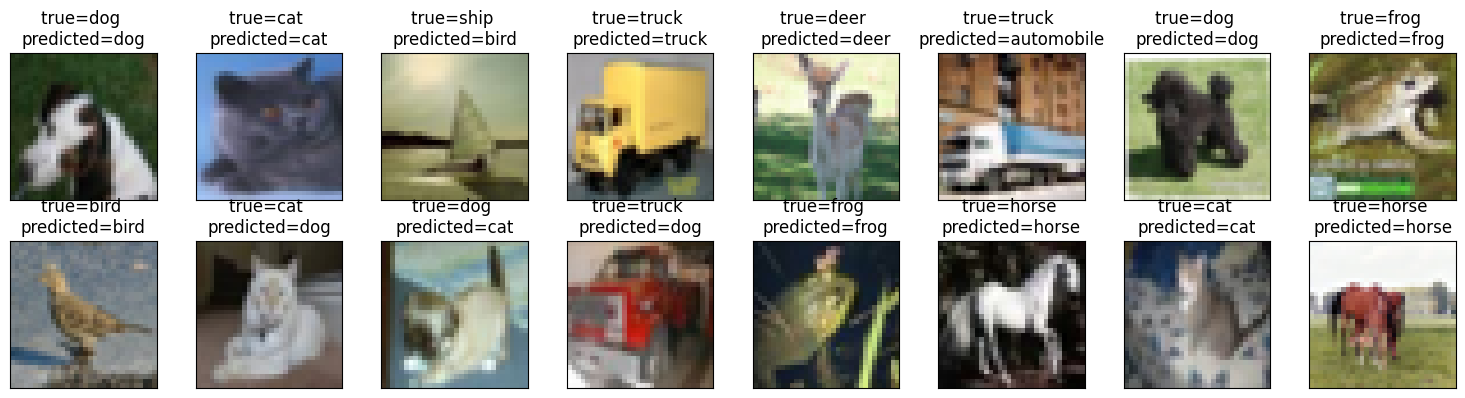

In [ ]:
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
axes = axes.ravel()

# 16개의 무작위 이미지를 선택하여 표시
for i in range(16):
    idx = np.random.randint(0, len(y_test))  # 무작위 인덱스 생성
    axes[i].imshow(X_test[idx, :])      # 이미지 표시
    axes[i].set_xticks([])                    # x축 눈금 제거
    axes[i].set_yticks([])                    # y축 눈금 제거

    # 이 부분만 처음 시각화한 거랑 다름, 예측값과 실제값을 비교하는 부분
    # 실제 라벨과 예측된 라벨로 제목 설정
    axes[i].set_title("true={} \npredicted={}".
                     format(cifa10_classes[y_true[idx]], cifa10_classes[y_pred[idx]]))

plt.tight_layout() # 서브플롯들이 겹치지 않도록 레이아웃 조정
plt.show()

## accuracy 시각화

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
cm

array([[649,  12, 103,  20,  14,   3,  25,  11, 111,  52],
       [  9, 752,  18,   9,   2,   2,  25,   3,  34, 146],
       [ 49,   2, 568,  52, 107,  51, 125,  20,  17,   9],
       [ 10,   4, 109, 441,  58, 139, 198,  17,   9,  15],
       [ 19,   3, 113,  58, 564,  24, 154,  52,  12,   1],
       [  3,   3, 104, 207,  53, 495,  90,  33,   8,   4],
       [  2,   1,  39,  29,  24,   9, 889,   2,   5,   0],
       [  9,   1,  60,  48, 114,  84,  29, 631,   4,  20],
       [ 45,  31,  31,  24,   5,   3,  19,   3, 812,  27],
       [ 26,  66,  11,  25,   7,   5,  33,   8,  41, 778]])

### heatmap 작성

Test Accuracy : 0.6579


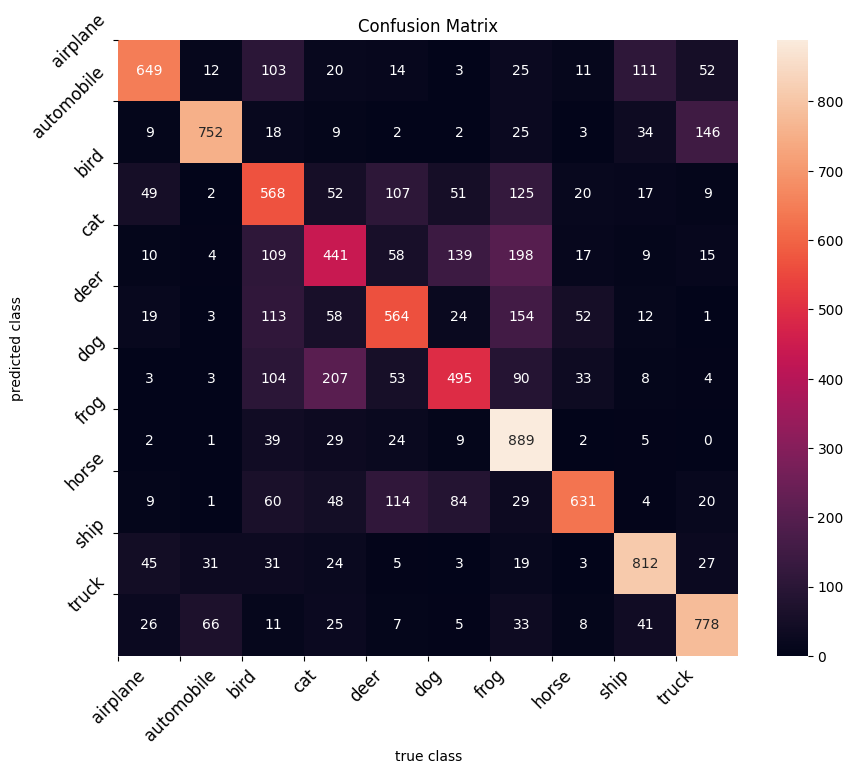

In [ ]:
plt.figure(figsize=(10,8))

sns.heatmap(cm, annot=True,fmt ='d') # fmt = 'd' 로 바꾸면 실제 숫자가 나옴  e로 안 나옴

plt.xticks(np.arange(10), cifa10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifa10_classes, rotation=45, fontsize=12)
plt.xlabel("true class")
plt.ylabel("predicted class")
plt.title('Confusion Matrix')
print('Test Accuracy :', accuracy_score(y_true, y_pred))

# 실습 :

## Convolutional Layer 와 Pooling Layer 를  추가하고 Hyper-parameter 조정하여 성능 개선 혹은 epochs 늘려서 accuracy 향상 비교